In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dreams = pd.read_csv("dreams.csv", index_col=0)

In [3]:
dreams["month"] = dreams.date.astype("datetime64[M]")

In [4]:
content_filter = (dreams["content"] != "no memory") & (dreams["content"] != "weak memory")

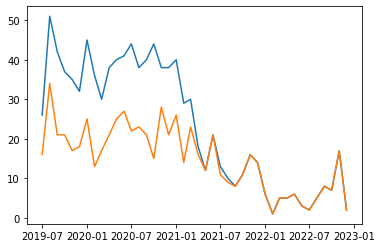

In [5]:
plt.plot(dreams.groupby("month").count()["date"])
plt.plot(dreams[content_filter].groupby("month").count()["date"])

In [6]:
dreams.shape[0]

979

In [7]:
dreams[content_filter].shape[0]

628